In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
state1 = pd.read_csv("states1.csv")
state1 = pd.read_csv("states1.csv").drop("Unnamed: 0",axis=1)
state1

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F
4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,$50690.194986743794,9600009M_10045763F
5,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,$50811.08205128205,4883331M_5123362F


In [4]:
print(state1.head())  # Check first few rows
print(state1.columns)  # Check column names
print(state1.dtypes)  # Check data types

   Unnamed: 0                 State  TotalPop             Hispanic  \
0           0              Colorado   5278906   20.78438003220608%   
1           1           Connecticut   3593222  15.604830917874388%   
2           2              Delaware    926454    8.82476635514019%   
3           3  District of Columbia    647484   9.165921787709499%   
4           4               Florida  19645772    21.3385426653884%   

                 White                Black                Native  \
0   69.89557165861504%   3.546376811594201%   0.5738325281803548%   
1    67.6770531400966%   10.34806763285027%  0.12620772946859898%   
2   64.63271028037383%  20.743925233644834%  0.25981308411214965%   
3  33.103910614525134%   51.77653631284915%  0.20055865921787713%   
4   59.08374880153398%  15.165675934803444%   0.2104506232023015%   

                 Asian                Pacific               Income  \
0   2.661996779388082%                    NaN  $64657.801787164906   
1   4.021980676328502%  

In [26]:
state1['Income'] = state1['Income'].replace({'\$': '', ',': ''}, regex=True)
state1['Income'] = pd.to_numeric(state1['Income'], errors='coerce')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\kk\AppData\Local\Temp\ipykernel_9460\3263142803.py:1: SyntaxWarning: invalid escape sequence '\$'
  state1['Income'] = state1['Income'].replace({'\$': '', ',': ''}, regex=True)


In [7]:
state1 = state1.drop_duplicates()

In [9]:
state1

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F
1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F
2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F
3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F
4,Florida,19645772,21.3385426653884%,59.08374880153398%,15.165675934803444%,0.2104506232023015%,2.2831735378715257%,0.05151006711409391%,50690.194987,9600009M_10045763F
5,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,50811.082051,4883331M_5123362F


In [15]:
race_columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for col in race_columns:
    state1[col] = state1[col].str.replace('%', '').astype(float)


In [21]:
state1['Income'] = state1['Income'].replace({'\$': '', ',': ''}, regex=True)
state1['Income'] = pd.to_numeric(state1['Income'], errors='coerce')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\kk\AppData\Local\Temp\ipykernel_11924\3263142803.py:1: SyntaxWarning: invalid escape sequence '\$'
  state1['Income'] = state1['Income'].replace({'\$': '', ',': ''}, regex=True)


In [23]:
state1[['Men', 'Women']] = state1['GenderPop'].str.split('_', expand=True)

In [25]:
state1['Men'] = state1['Men'].str.replace('M', '').astype(float)
state1['Women'] = state1['Women'].str.replace('F', '').astype(float)

In [27]:
state1['Women'] = state1['Women'].fillna(state1['TotalPop'] - state1['Men'])

In [29]:
state1 = state1.drop_duplicates()

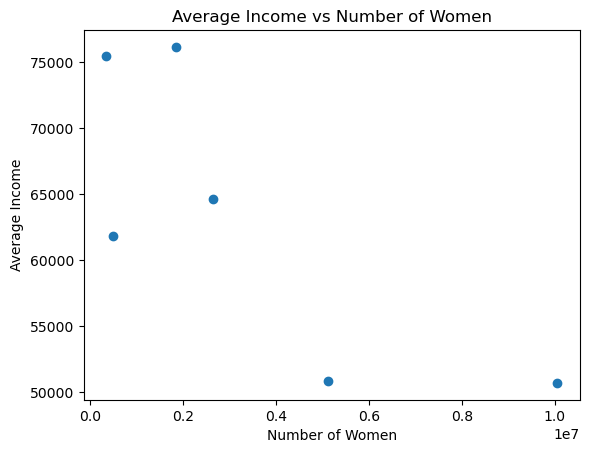

In [31]:
import matplotlib.pyplot as plt

plt.scatter(state1['Women'], state1['Income'])
plt.xlabel('Number of Women')
plt.ylabel('Average Income')
plt.title('Average Income vs Number of Women')
plt.show()

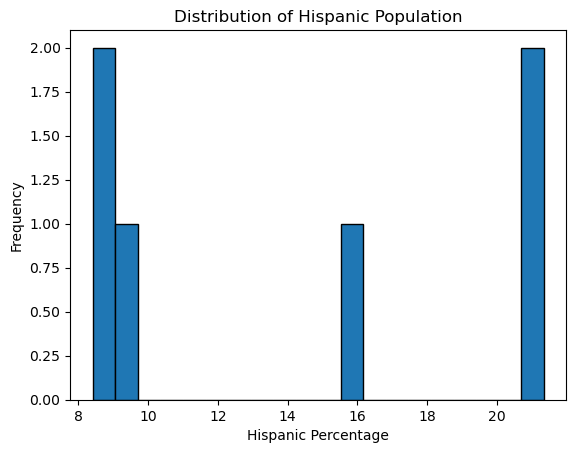

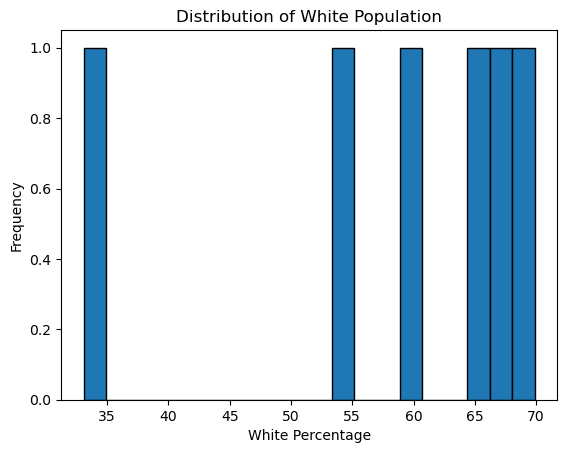

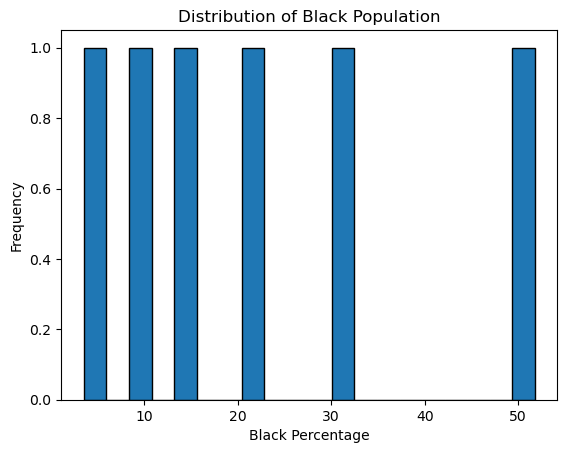

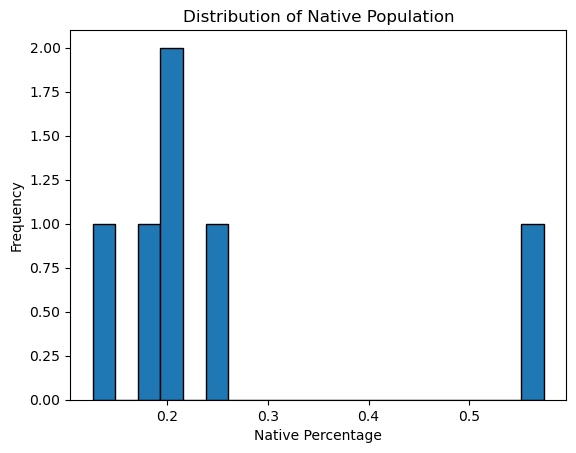

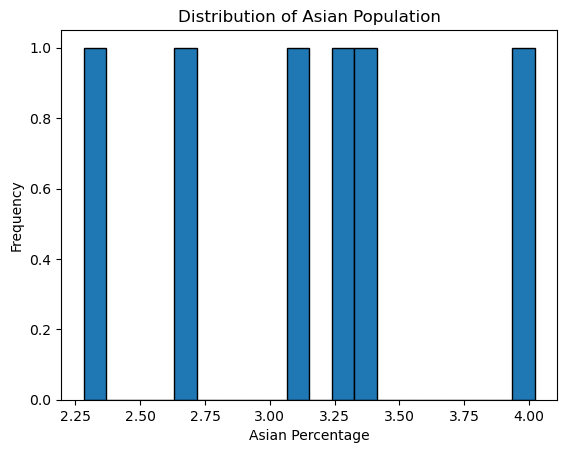

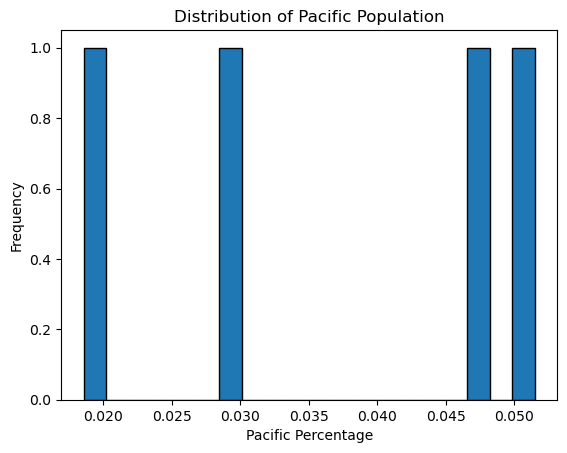

In [37]:
for col in race_columns:
    plt.hist(state1[col], bins=20, edgecolor='black')
    plt.xlabel(f'{col} Percentage')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col} Population')
    plt.show()

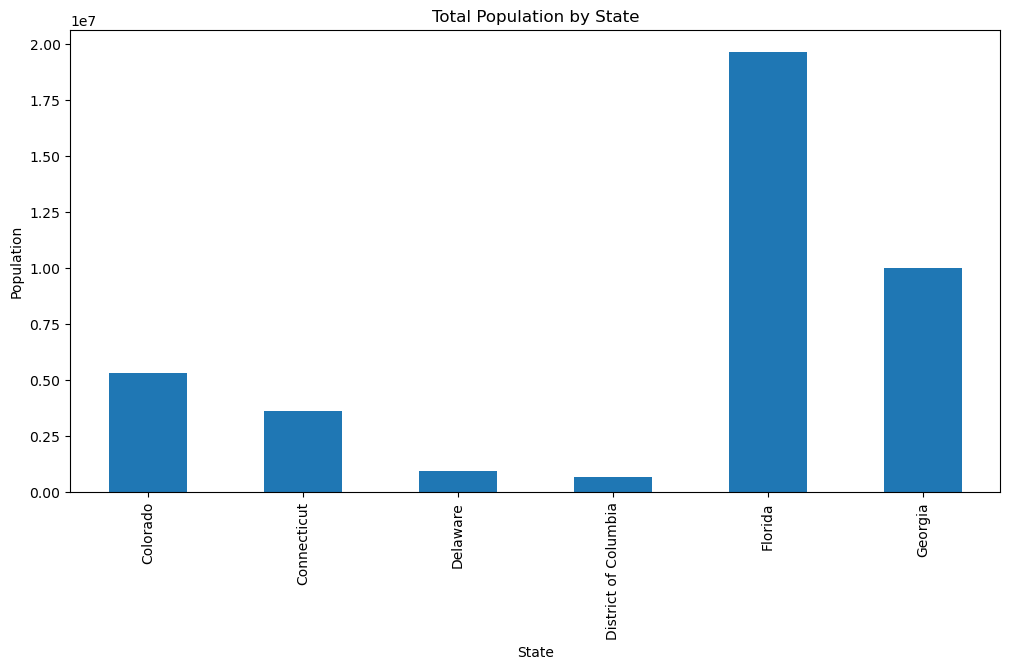

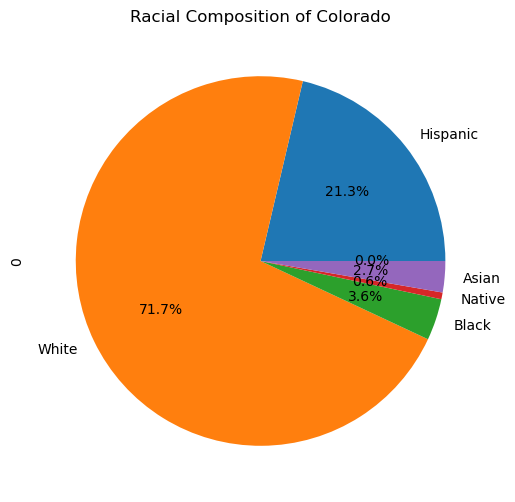

In [39]:
# Bar plot of total population by state
state1.set_index('State')['TotalPop'].plot(kind='bar', figsize=(12, 6))
plt.title('Total Population by State')
plt.ylabel('Population')
plt.show()

# Pie chart of racial composition for a specific state (e.g., Colorado)
colorado = state1[state1['State'] == 'Colorado'][race_columns].squeeze()
colorado.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Racial Composition of Colorado')
plt.show()

In [47]:
# Check for missing values
print(state1.isnull().sum())

# Check for duplicates
print(state1.duplicated().sum())

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      2
Income       0
GenderPop    0
Men          0
Women        0
dtype: int64
0
